# The 10-armed Testbed

This was a set of 2000 randomly generated k-armed bandit problems with k=10. For each bandit problem, the action values $q_*(a), a=1,\ldots,10$, where selected according to a normal (Gaussian) distribution with mean 0 and variance 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(2000, 10)


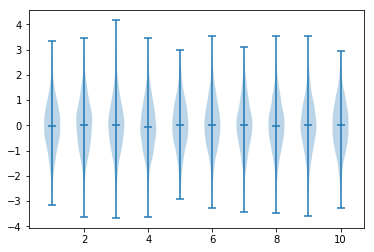

In [2]:
N = 2000
k = 10
Q_star = np.array([np.random.normal(0, 1, k) for i in np.arange(N)])

print(Q_star.shape)

plt.violinplot(Q_star, showmeans=False, showmedians=True)
plt.show()

In [11]:
# Bandit model

class Bandit:
    def __init__(self, arms, q_star):
        # states
        self.S = 0
        
        # number of arms
        self.K = arms
        
        # true values of each arm
        self.Q = q_star
        
        # statistics for actions
        self.stats = np.zeros((arms, 2))
        
    def step(self, action):
        self.S += 1
        r = np.random.normal(self.Q[action], 1)
        
        self.stats[action, 0] += 1.0
        self.stats[action, 1] += r
        
        return self.S, r
    
    def reset(self):
        self.S = 0

    def action_stats(self, action):
        return self.stats[action][0], self.stats[action][1]

In [34]:
num_steps = 1000

def experiment(epsilon = 0.0, initial_value = 0.0):

    Q = np.zeros((N, k)) + initial_value
    rewards = np.zeros((N, num_steps))
    
    for i in np.arange(N):

        # create the model
        model = Bandit(k, Q_star[i])
        
        for j in np.arange(num_steps):

            if np.random.rand() < epsilon:
                a = np.random.randint(0, k)
            else:
                a = np.argmax(Q[i])

            # move a step
            _, r = model.step(a)

            # record the rewards
            rewards[i, j] = r

            # update value function
            counts, total_rewards = model.action_stats(a)
            Q[i, a] = total_rewards/counts
    
    return rewards


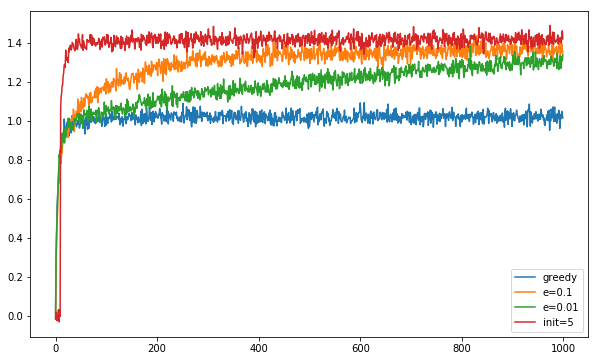

In [36]:
R1 = np.mean(experiment(), axis=0)
R2 = np.mean(experiment(0.1), axis=0)
R3 = np.mean(experiment(0.01), axis=0)

R4 = np.mean(experiment(0.0, 5.0), axis=0)

plt.figure(figsize=(10,6))
plt.plot(R1, label='greedy')
plt.plot(R2, label='e=0.1')
plt.plot(R3, label='e=0.01')
plt.plot(R4, label='init=5')
plt.legend()
plt.show()